In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

d:\Python\APPS\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Python\APPS\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Python\APPS\Anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
class LeNet:
    """
    Simplified LeNet model implementing sliding-window convolution with selectable pooling mode.
    """

    def __init__(self, kernel: np.ndarray, pool_size: int = 2, pooling_mode: str = "max") -> None:
        """
        Initialize the model with a given convolution kernel, pooling size, and mode.

        Parameters:
            kernel (np.ndarray): 2D numpy array (e.g., 3x3) for convolution.
            pool_size (int): Pooling window size (default: 2x2).
            pooling_mode (str): Type of pooling - "max" or "mean" (default: "max").
        """
        self.kernel = kernel
        self.pool_size = pool_size
        if pooling_mode not in ["max", "mean"]:
            raise ValueError("Invalid pooling mode! Choose 'max' or 'mean'.")
        self.pooling_mode = pooling_mode

    def sliding_window_convolution(self, image: np.ndarray) -> np.ndarray:
        """
        Apply a 3x3 convolution kernel to a 2D image using a sliding window.

        Parameters:
            image (np.ndarray): Grayscale image as a 2D numpy array.

        Returns:
            np.ndarray: Convolved image.
        """
        img_h, img_w = image.shape
        k_h, k_w = self.kernel.shape
        output_h, output_w = img_h - k_h + 1, img_w - k_w + 1

        # Initialize output array
        output = np.zeros((output_h, output_w))

        # Sliding window operation
        for i in range(output_h):
            for j in range(output_w):
                region = image[i:i + k_h, j:j + k_w]
                output[i, j] = np.sum(region * self.kernel)

        # Normalize output
        output = np.clip(output, 0, 255)
        return output.astype(np.uint8)

    def apply_pooling(self, image: np.ndarray) -> np.ndarray:
        """
        Apply pooling (max or average) based on the selected mode.

        Parameters:
            image (np.ndarray): Input 2D array.

        Returns:
            np.ndarray: Pooled image.
        """
        img_h, img_w = image.shape
        stride = self.pool_size
        output_h, output_w = img_h // stride, img_w // stride

        pooled = np.zeros((output_h, output_w))

        for i in range(output_h):
            for j in range(output_w):
                region = image[i*stride:(i+1)*stride, j*stride:(j+1)*stride]
                if self.pooling_mode == "max":
                    pooled[i, j] = np.max(region)  # Max pooling
                else:
                    pooled[i, j] = np.mean(region)  # Average pooling

        return pooled.astype(np.uint8)

    def forward(self, image_path: str) -> None:
        """
        Load an image, apply convolution, pooling, and visualize results.

        Parameters:
            image_path (str): Path to the input image.
        """
        # Load grayscale image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError("Error loading image. Check the file path.")

        # Apply convolution
        convolved_image = self.sliding_window_convolution(image)

        # Apply selected pooling method
        pooled_image = self.apply_pooling(convolved_image)

        # Visualization
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(convolved_image, cmap="gray")
        plt.title("Convolved Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(pooled_image, cmap="gray")
        plt.title(f"Pooled Image ({self.pooling_mode}-pooling)")
        plt.axis("off")

        plt.show()


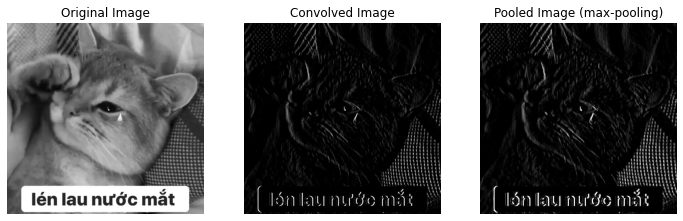

In [6]:
# Define a 3x3 edge detection kernel (Sobel X filter)
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Create LeNet model with pooling_mode="max"
lenet_max = LeNet(kernel, pool_size=2, pooling_mode="max")

# Process an image with max-pooling
lenet_max.forward("cat.png")